In [1]:
import numpy as np
import pandas as pd
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

style.use("seaborn-whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
df = pd.read_csv("D:/Anaconda/Data_Science/big_five_stocks.csv")

In [4]:
data_size_mb = df.memory_usage().sum() / 1024 / 1024
print("Data memory size: %.2f MB" % data_size_mb)

Data memory size: 2.23 MB


In [5]:
df.head(3)

,Unnamed: 0,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0


In [6]:
df.shape

(41660, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41660 entries, 0 to 41659
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41660 non-null  object 
 1   name        41660 non-null  object 
 2   open        41660 non-null  float64
 3   close       41660 non-null  float64
 4   high        41660 non-null  float64
 5   low         41660 non-null  float64
 6   volume      41660 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.2+ MB


In [8]:
df.name.unique()

array(['^IXIC', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB'], dtype=object)

In [9]:
df.isnull().sum().sort_values(ascending = False)

volume        0
low           0
high          0
close         0
open          0
name          0
Unnamed: 0    0
dtype: int64

In [10]:
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])
df["year"] = df["Unnamed: 0"].dt.year
df["month"] = df["Unnamed: 0"].dt.month
df = df.rename({"Unnamed: 0" : "date"}, axis = 1, inplace = False)

In [11]:
sub_aapl = df[df.name == "AAPL"].drop("name", axis = 1)
sub_msft = df[df.name == "MSFT"].drop("name", axis = 1)
sub_amzn = df[df.name == "AMZN"].drop("name", axis = 1)
sub_googl = df[df.name == "GOOGL"].drop("name", axis = 1)
sub_fb = df[df.name == "FB"].drop("name", axis = 1)
sub_nas = df[df.name == "^IXIC"].drop("name", axis = 1)

sub_aapl.set_index("date", drop = True, inplace = True)
sub_msft.set_index("date", drop = True, inplace = True)
sub_amzn.set_index("date", drop = True, inplace = True)
sub_googl.set_index("date", drop = True, inplace = True)
sub_fb.set_index("date", drop = True, inplace = True)
sub_nas.set_index("date", drop = True, inplace = True)

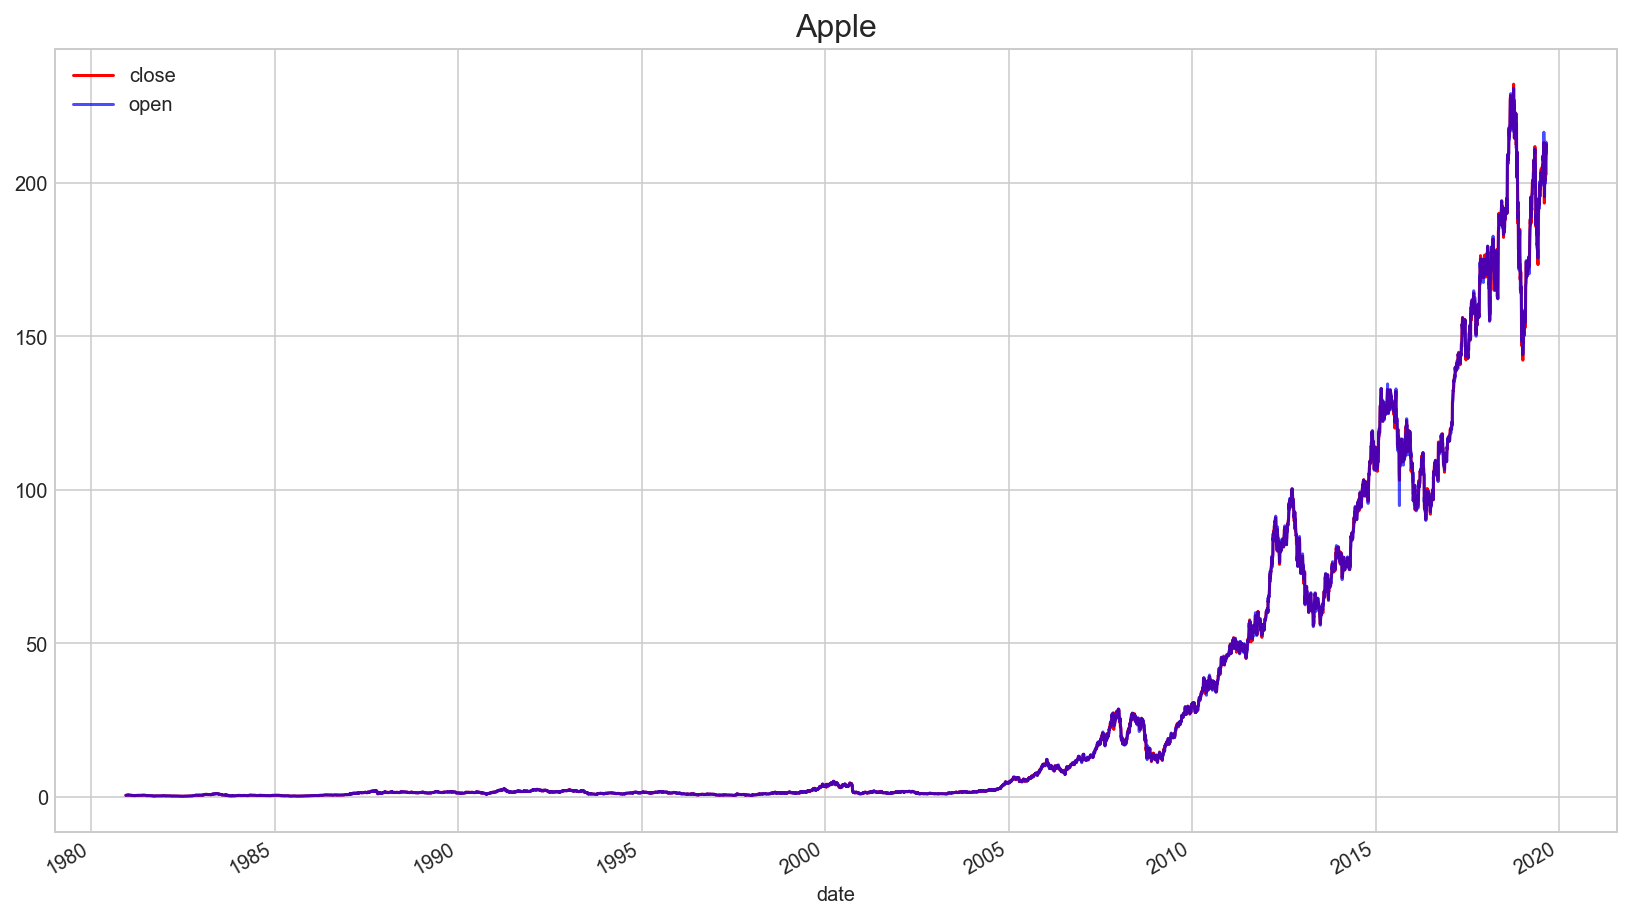

In [12]:
plt.figure(figsize = (14,8))
sub_aapl["close"].plot(color = "red", label = "close")
sub_aapl["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Apple", fontsize = 16)
plt.legend()
plt.show()

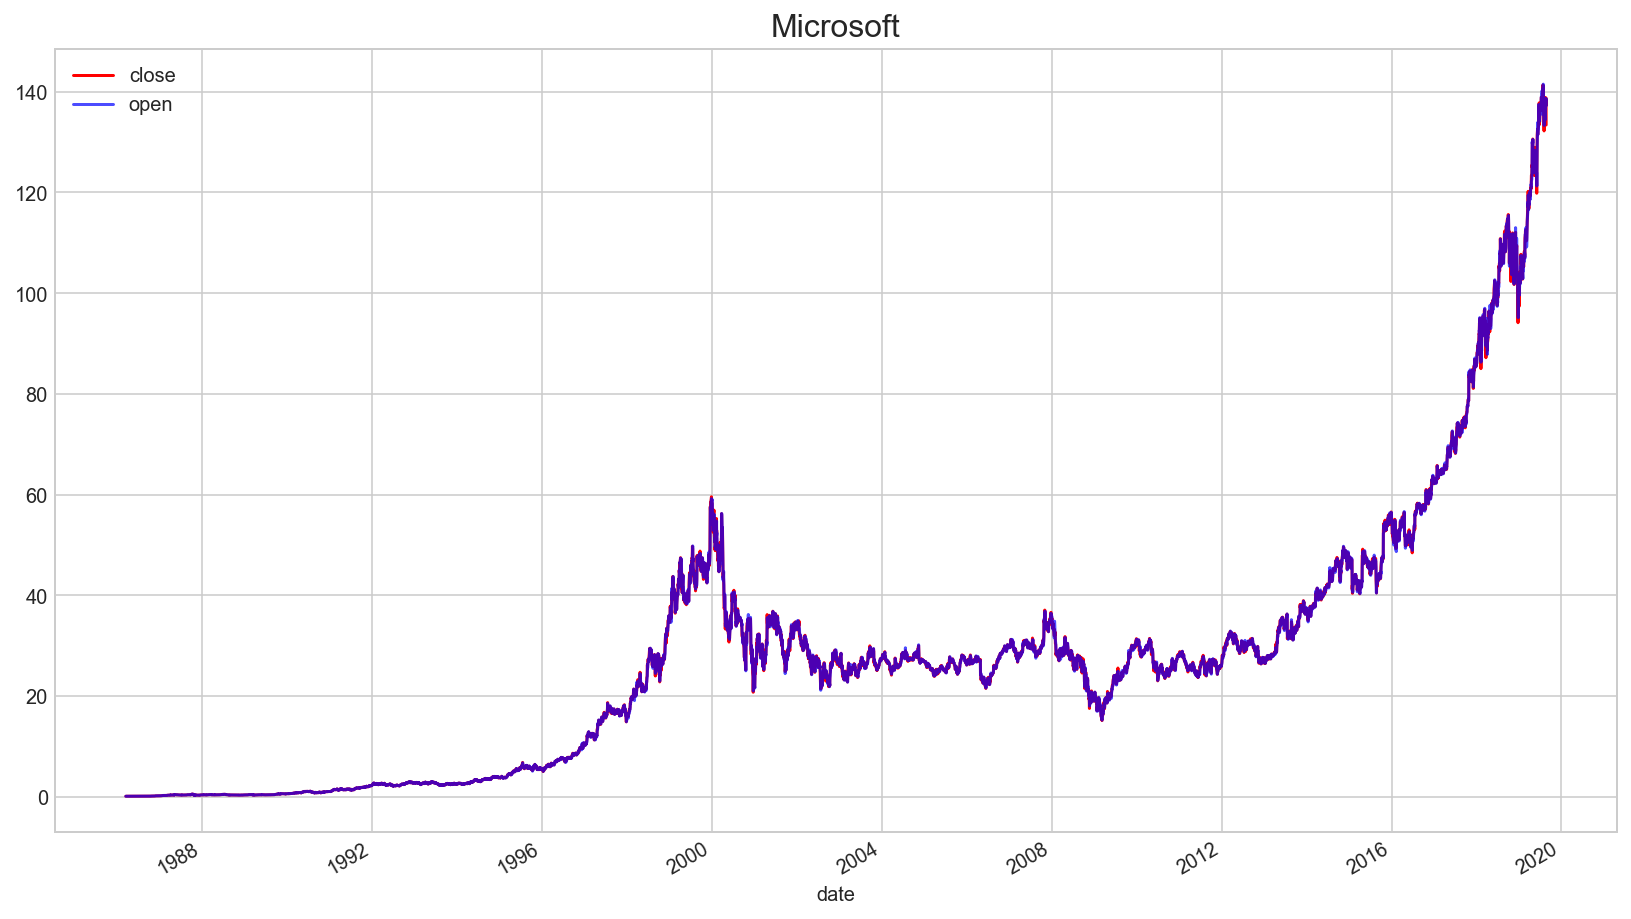

In [13]:
plt.figure(figsize = (14,8))
sub_msft["close"].plot(color = "red", label = "close")
sub_msft["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Microsoft", fontsize = 16)
plt.legend()
plt.show()

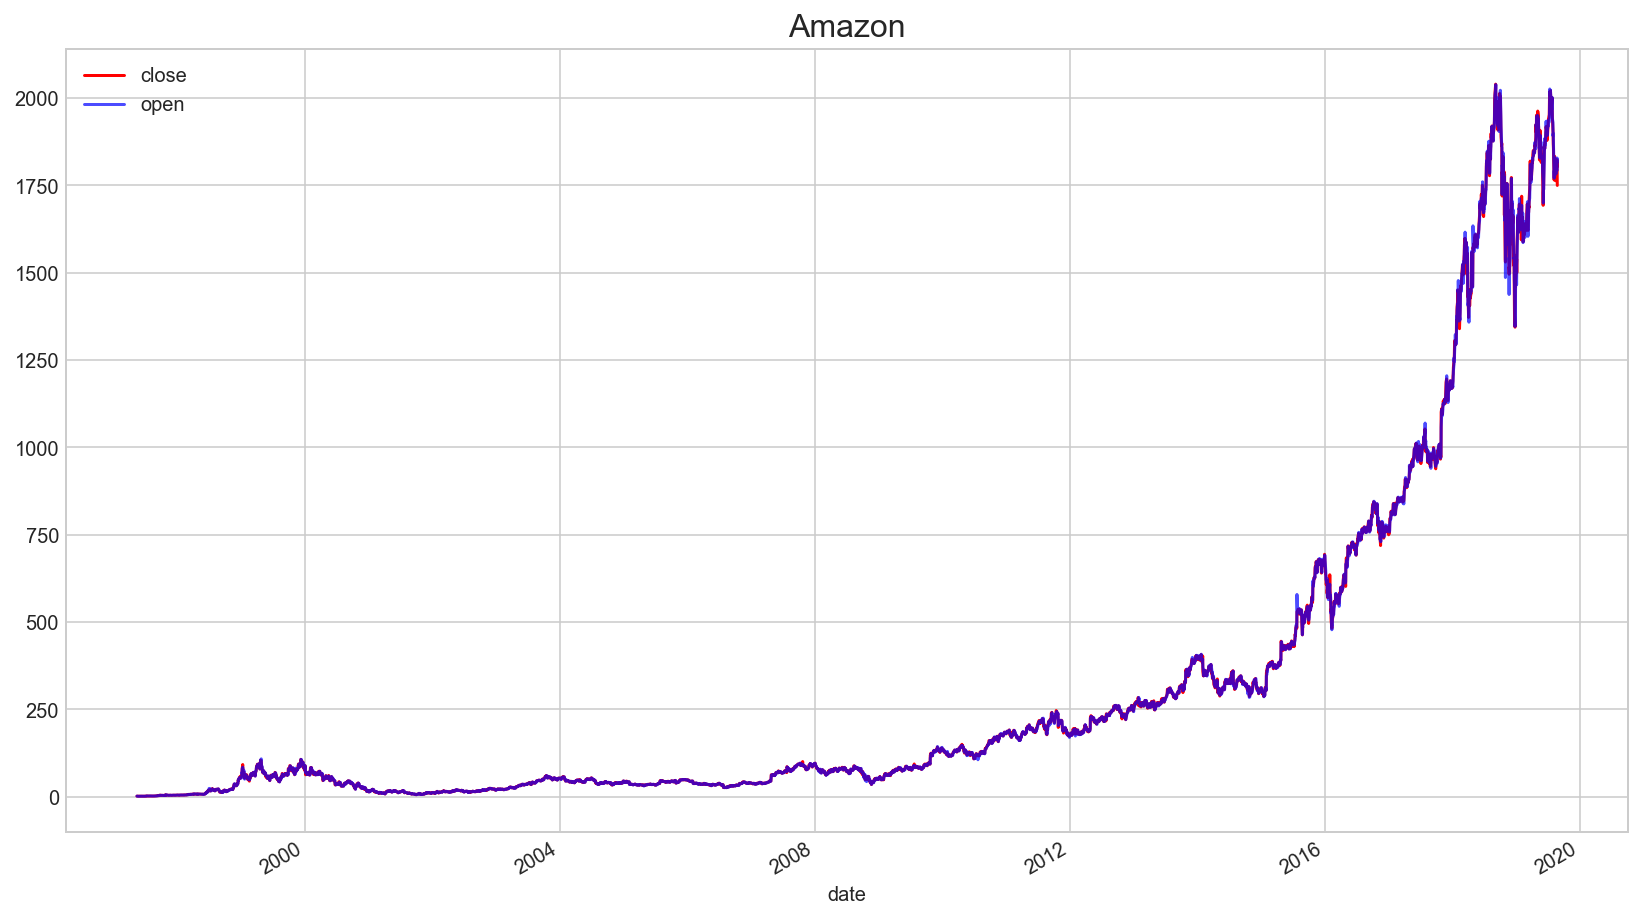

In [14]:
plt.figure(figsize = (14,8))
sub_amzn["close"].plot(color = "red", label = "close")
sub_amzn["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Amazon", fontsize = 16)
plt.legend()
plt.show()

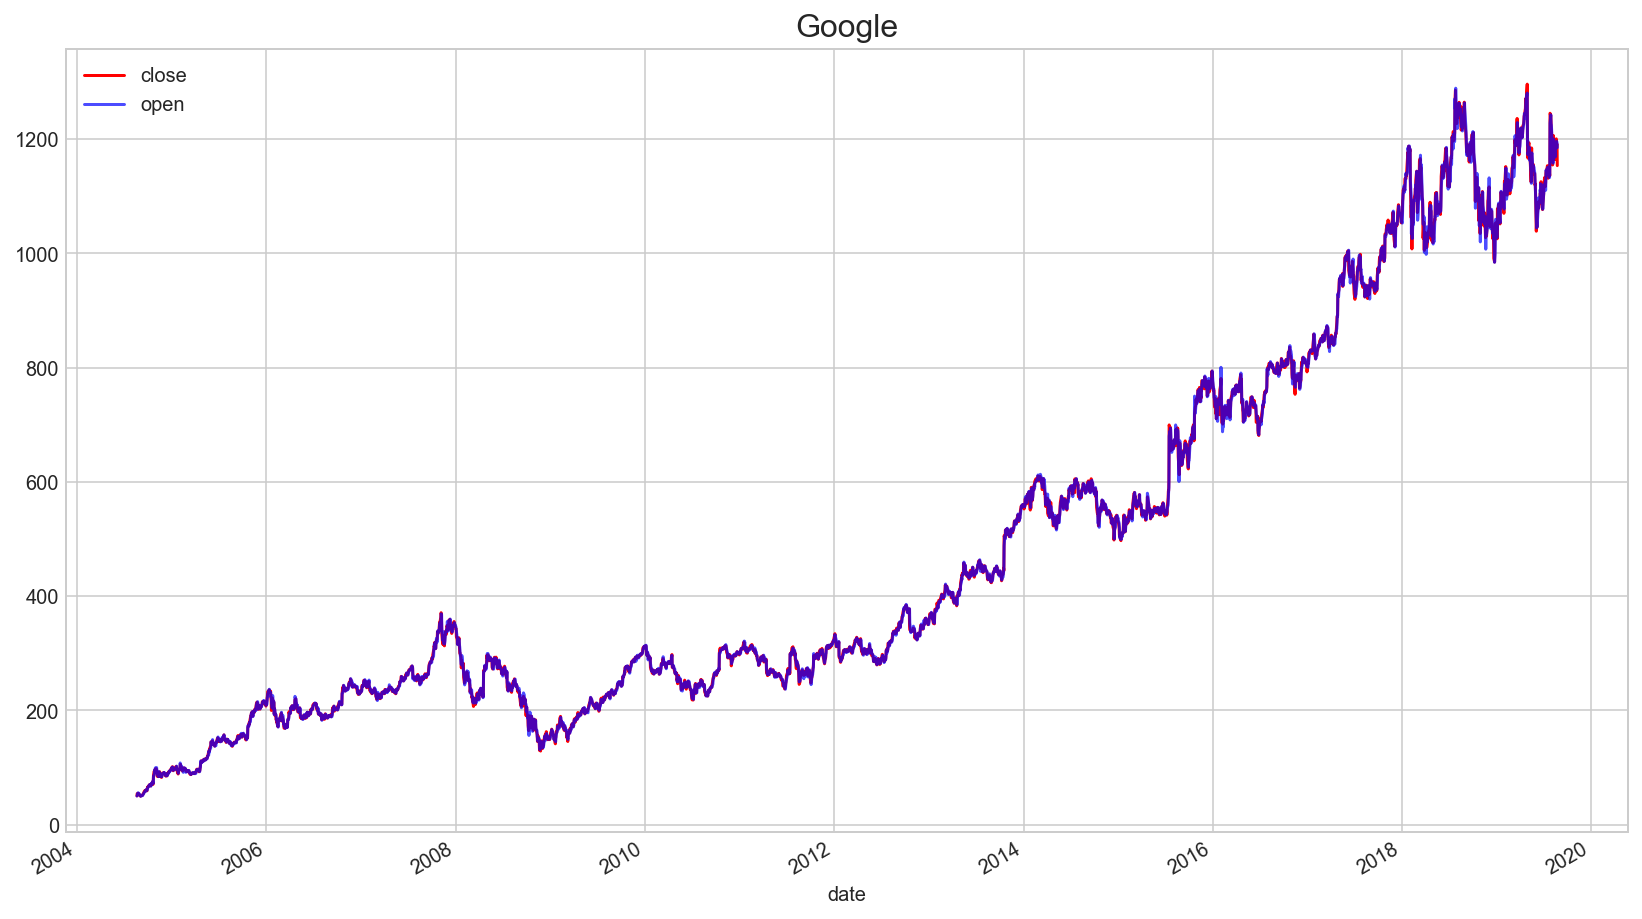

In [15]:
plt.figure(figsize = (14,8))
sub_googl["close"].plot(color = "red", label = "close")
sub_googl["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Google", fontsize = 16)
plt.legend()
plt.show()

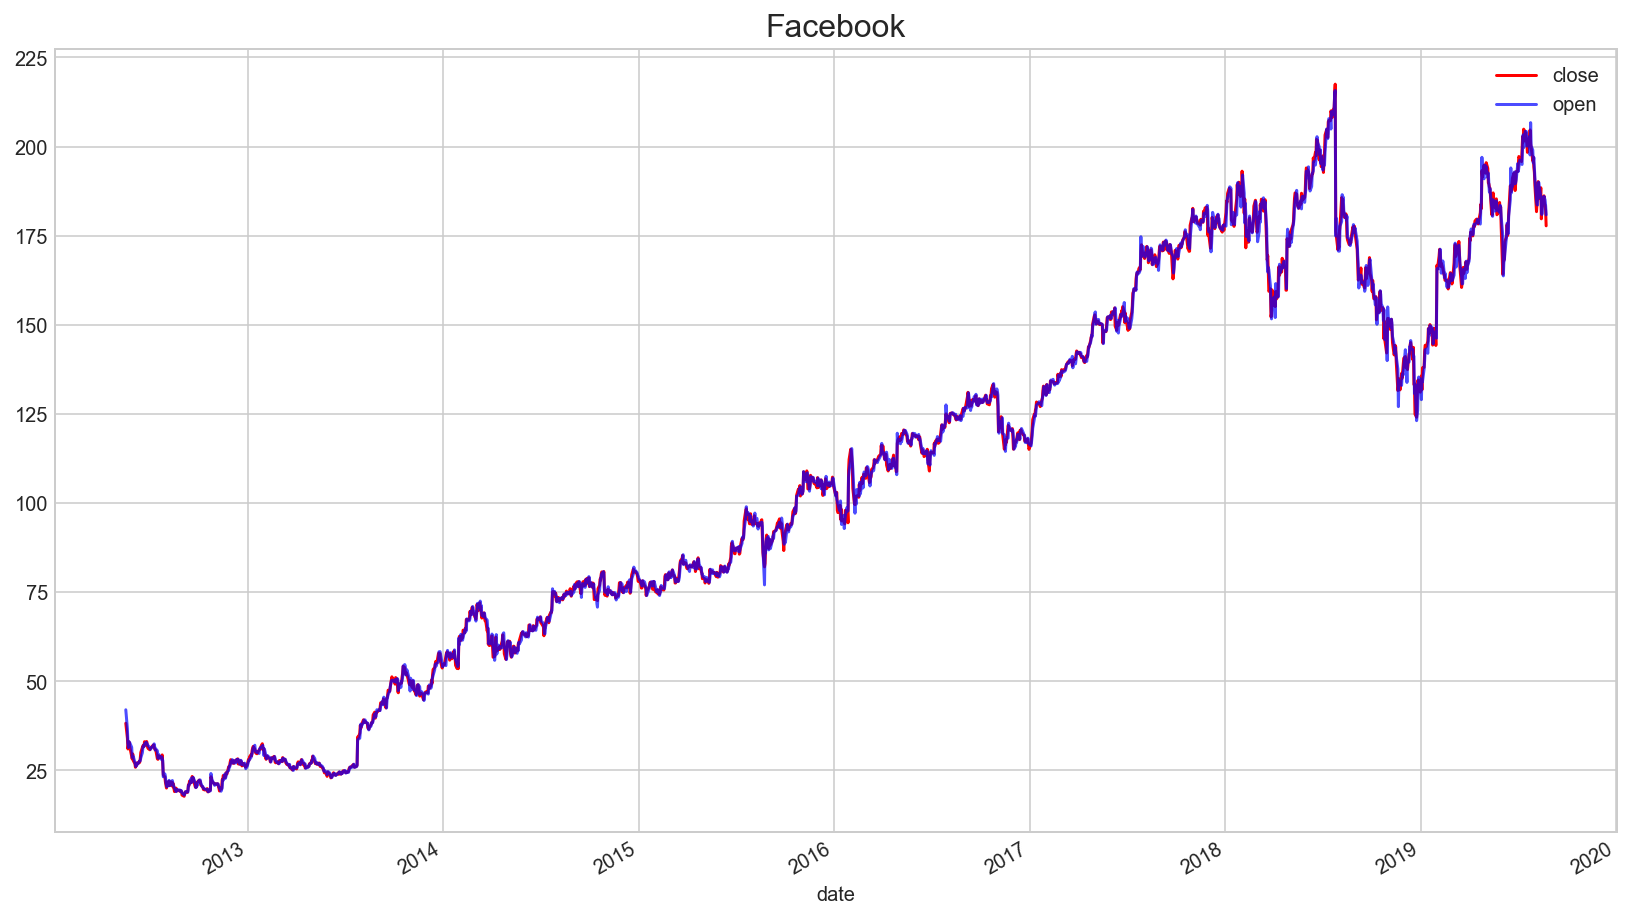

In [16]:
plt.figure(figsize = (14,8))
sub_fb["close"].plot(color = "red", label = "close")
sub_fb["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Facebook", fontsize = 16)
plt.legend()
plt.show()

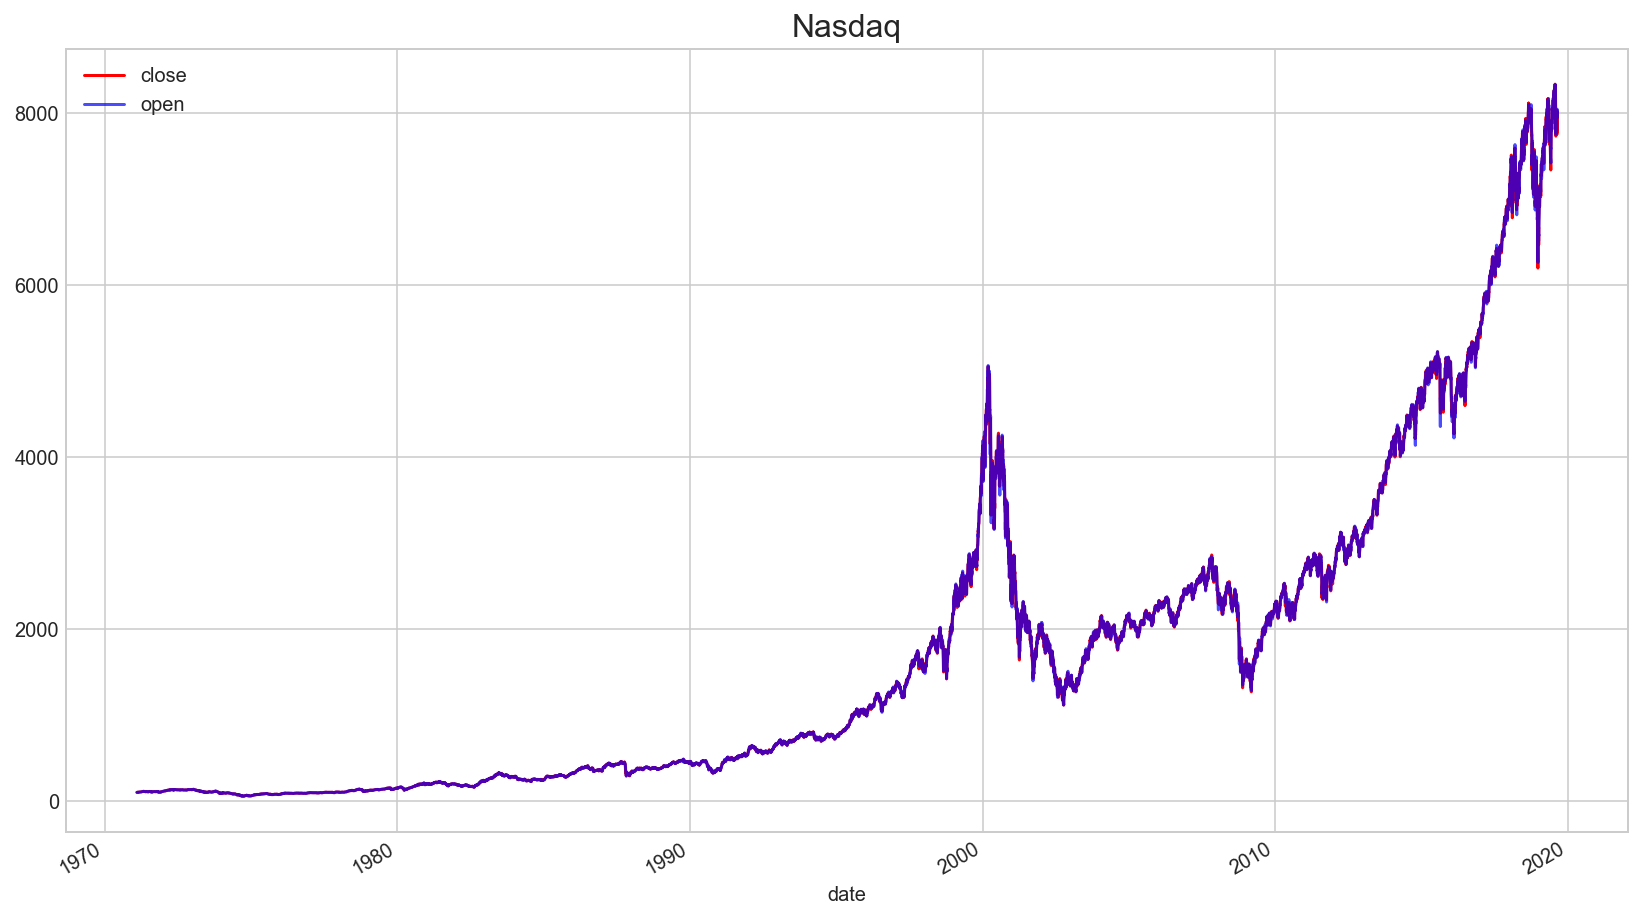

In [17]:
plt.figure(figsize = (14,8))
sub_nas["close"].plot(color = "red", label = "close")
sub_nas["open"].plot(color = "blue", alpha = 0.7, label = "open")
plt.title("Nasdaq", fontsize = 16)
plt.legend()
plt.show()

In [18]:
sub_aapl_year = df[(df.name == "AAPL") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_msft_year = df[(df.name == "MSFT") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_amzn_year = df[(df.name == "AMZN") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_googl_year = df[(df.name == "GOOGL") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_fb_year = df[(df.name == "FB") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_nas_year = df[(df.name == "^IXIC") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)

In [19]:
sub_aapl_year.head(3)

,date,open,close,high,low,volume,year,month
0,2015-01-02,111.39,109.33,111.44,107.35,53204626.0,2015,1
1,2015-01-05,108.29,106.25,108.65,105.41,64285491.0,2015,1
2,2015-01-06,106.54,106.26,107.43,104.63,65797116.0,2015,1


In [20]:
comp_stocks = pd.DataFrame({"AAPL" : sub_aapl_year["close"],
                            "GOOGL" : sub_googl_year["close"],
                            "AMZN" : sub_amzn_year["close"],
                            "MSFT" : sub_msft_year["close"],
                            "FB" : sub_fb_year["close"],
                            "NASDAQ" : sub_nas_year["close"]})

In [21]:
comp_stocks.head(3)

,AAPL,GOOGL,AMZN,MSFT,FB,NASDAQ
0,109.33,529.55,308.52,46.76,78.45,4726.81
1,106.25,519.46,302.19,46.33,77.19,4652.57
2,106.26,506.64,295.29,45.65,76.15,4592.74


In [22]:
sub_returns = comp_stocks.apply(lambda x: x / x[0])
sub_returns["DATE"] = sub_aapl_year["date"]
sub_returns.set_index("DATE", drop = True, inplace = True)

In [23]:
sub_returns.head(3)

,AAPL,GOOGL,AMZN,MSFT,FB,NASDAQ
DATE,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.971828,0.980946,0.979483,0.990804,0.983939,0.984294
2015-01-06,0.971920,0.956737,0.957118,0.976262,0.970682,0.971636


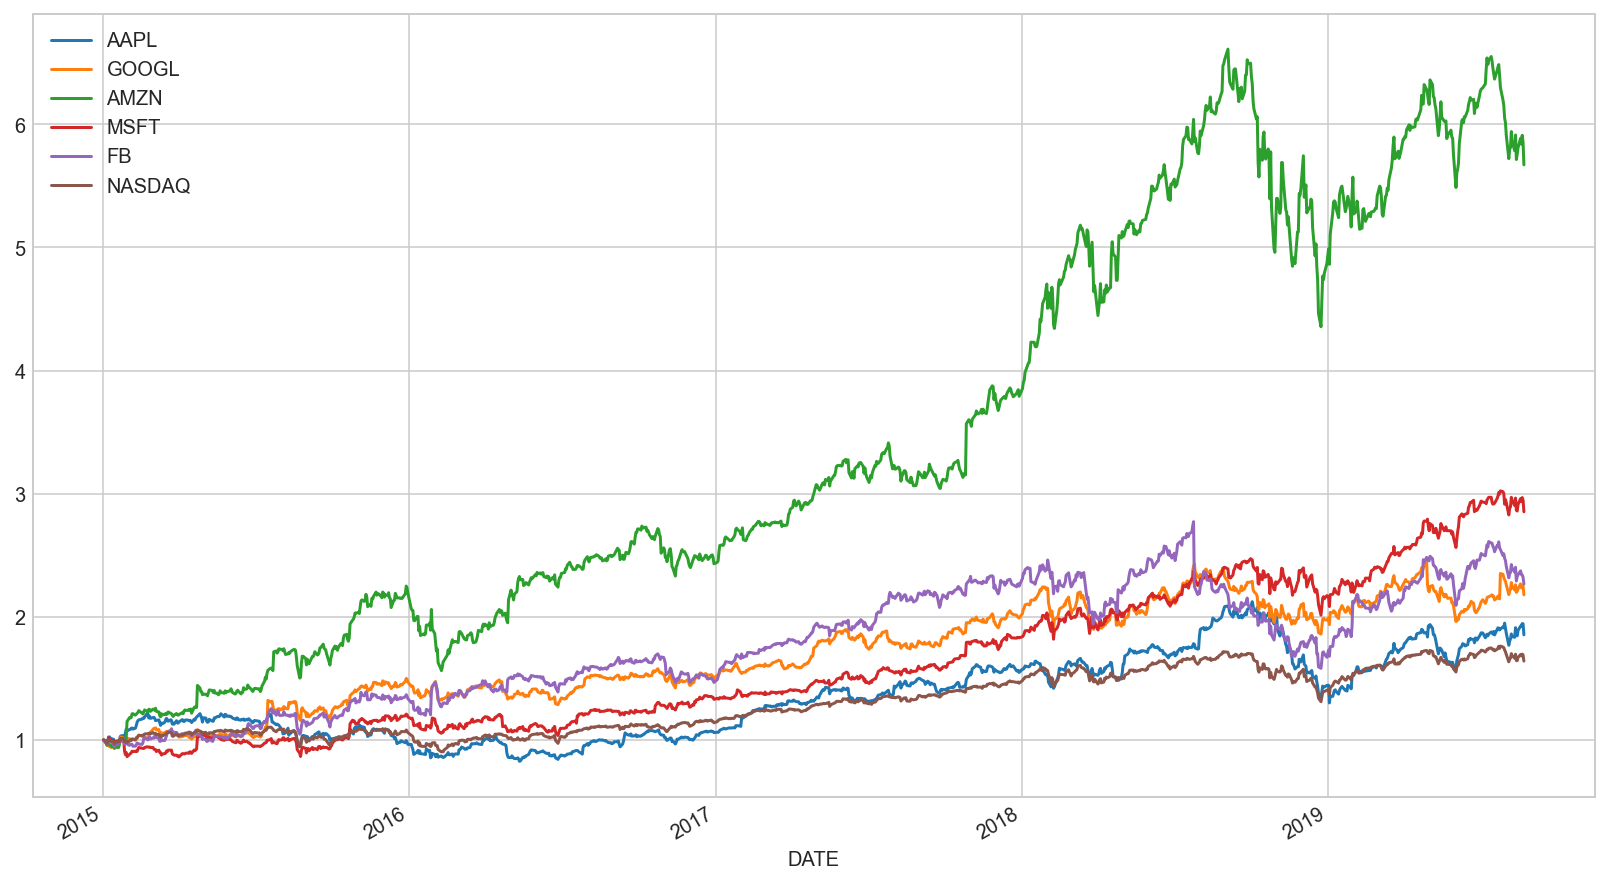

In [24]:
sub_returns.plot(figsize = (14,8))
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
X = sub_amzn_year[["date"]].values
Y = sub_amzn_year[["close"]].values

In [27]:
s = StandardScaler()
X = s.fit_transform(X)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    random_state = 0, 
                                                    test_size = 0.25)

In [29]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
print("Test score: " + str(lm.score(X_test, Y_test)))
print("Train score: " + str(lm.score(X_train, Y_train)))

Y_predicted_lm = lm.predict(X_test)

Test score: 0.9187017483455091
Train score: 0.9271244531795957


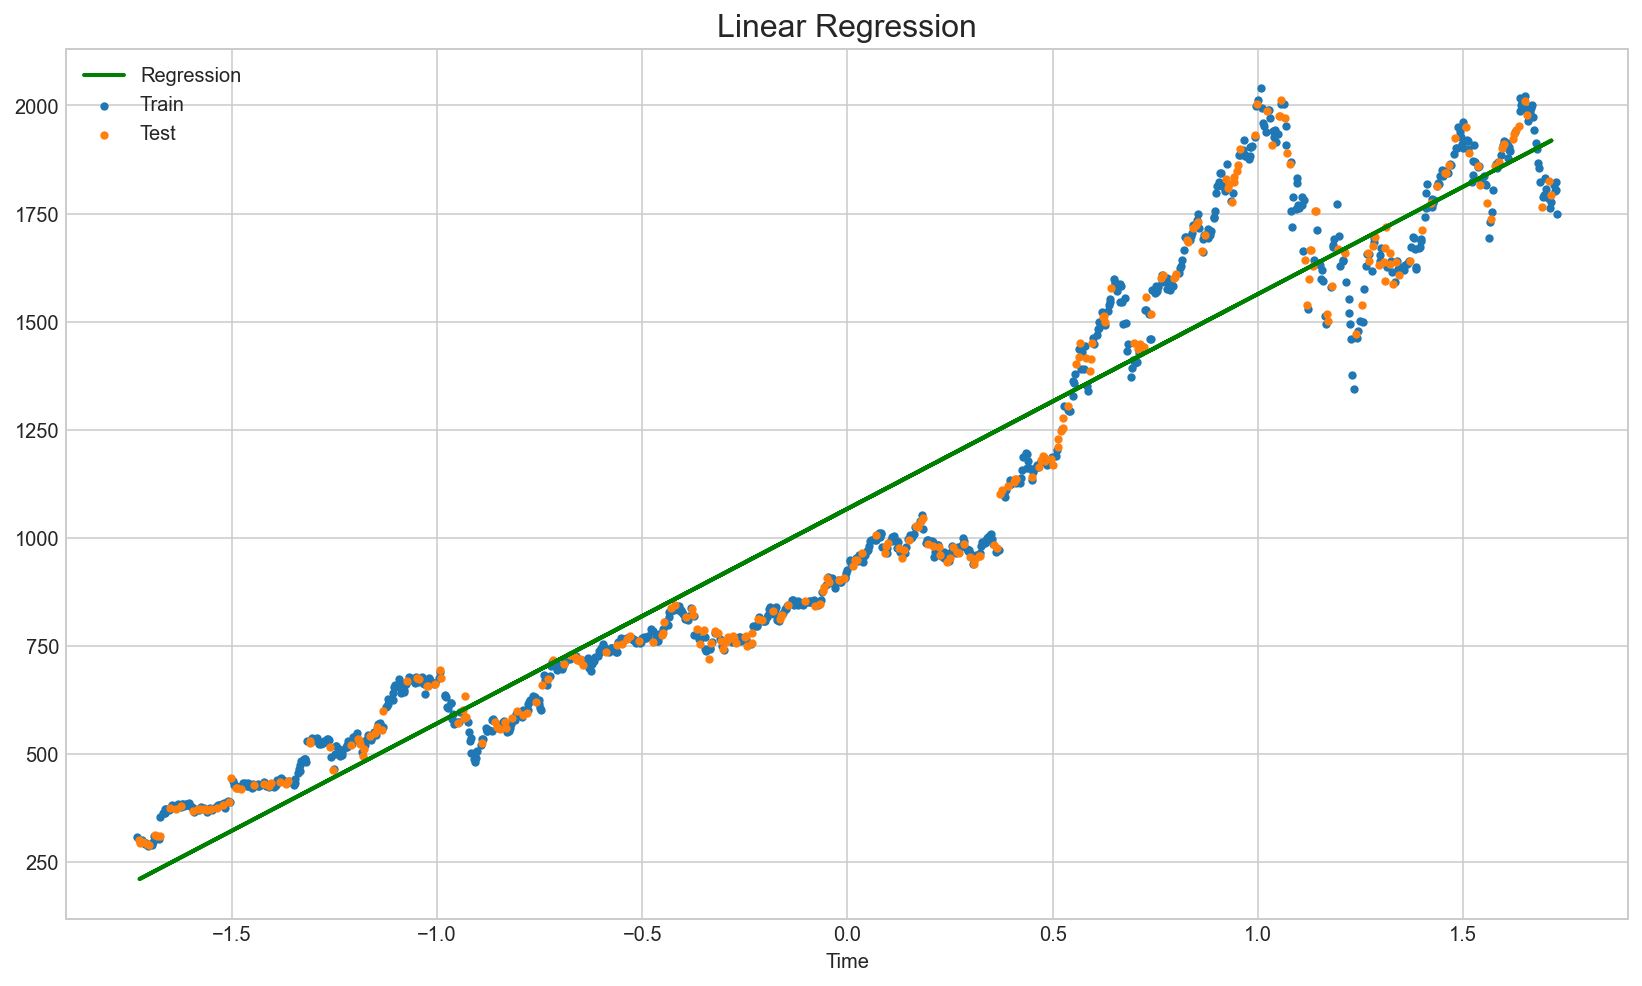

In [30]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, Y_train, s = 10, label = "Train")
plt.scatter(X_test, Y_test, s = 10, label = "Test")
plt.plot(X_test, Y_predicted_lm, color = "green", linewidth = 2, label = "Regression")
plt.xlabel("Time")
plt.title("Linear Regression", fontsize = 16)
plt.legend()
plt.show()

In [31]:
poly = PolynomialFeatures(degree = 3)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)

In [32]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_transformed, Y_train)
print("Test score: " + str(lm_poly.score(X_test_transformed, Y_test)))
print("Train score: " + str(lm_poly.score(X_train_transformed, Y_train)))

Test score: 0.9394939031691257
Train score: 0.9453475316466065


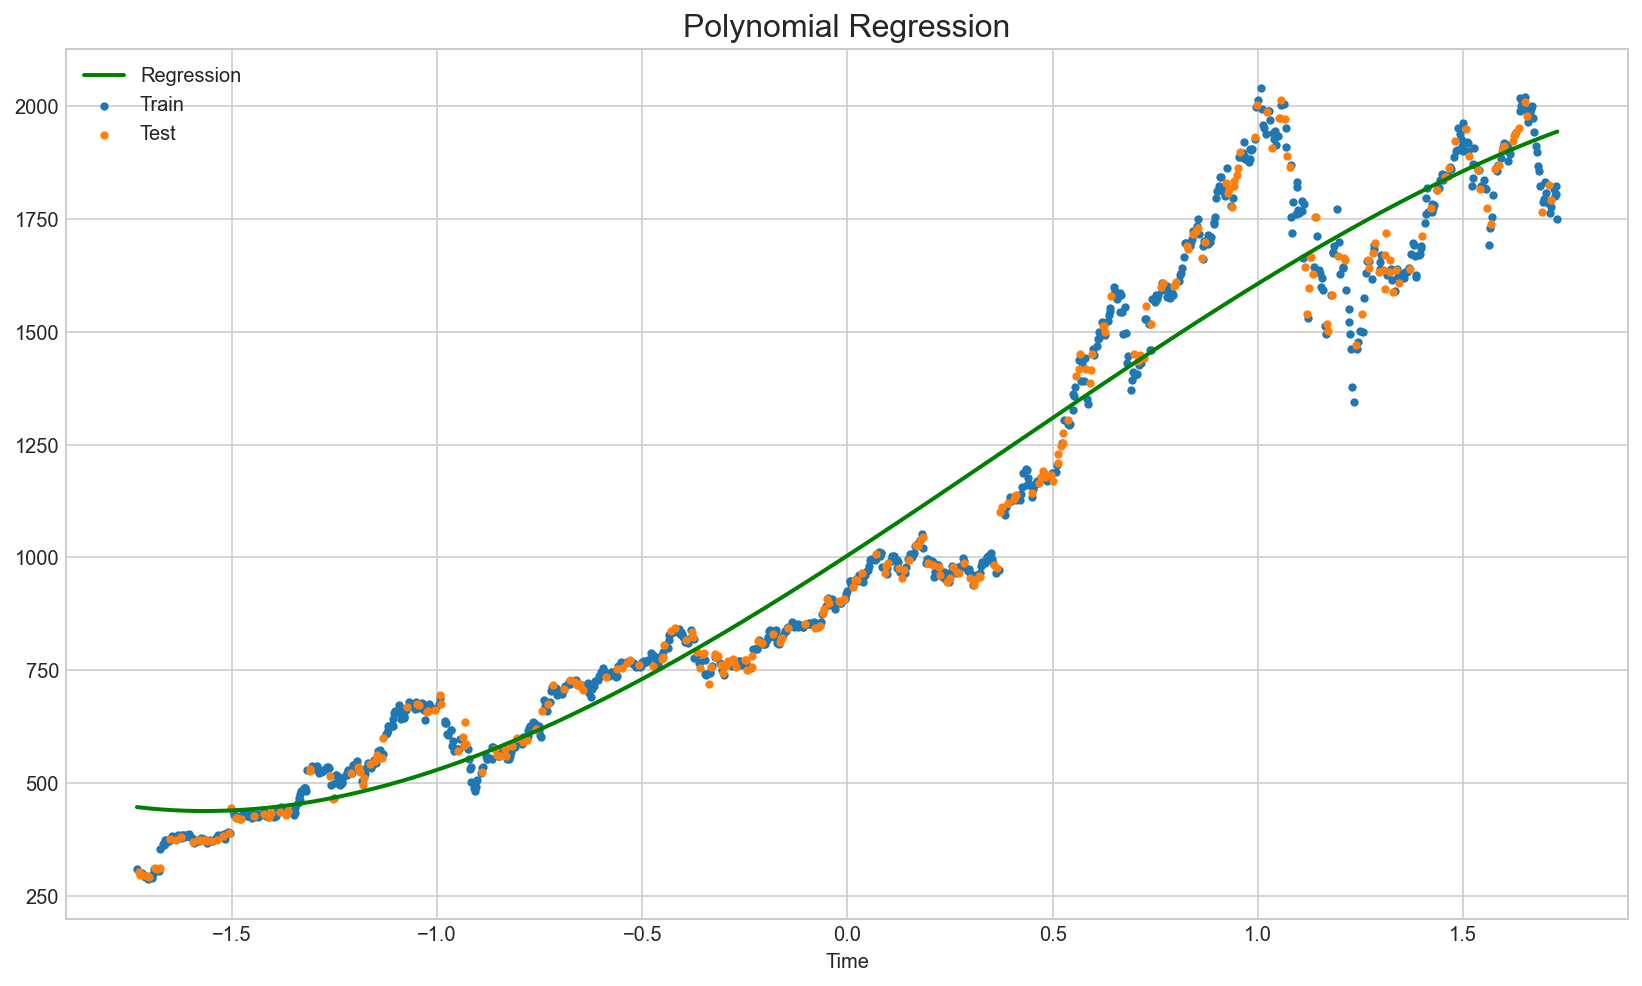

In [33]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, Y_train, s = 10, label = "Train")
plt.scatter(X_test, Y_test, s = 10, label = "Test")
plt.plot(X, lm_poly.predict(poly.fit_transform(X)), color = "green", linewidth = 2, label = "Regression")
plt.xlabel("Time")
plt.title("Polynomial Regression", fontsize = 16)
plt.legend()
plt.show()